In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(pheatmap))
suppressPackageStartupMessages(library(plyr))
library(pheatmap)
library(RColorBrewer)
library(viridis)

Warning message:
“package ‘dplyr’ was built under R version 4.3.3”
Warning message:
“package ‘tidyr’ was built under R version 4.3.3”
Warning message:
“package ‘tibble’ was built under R version 4.3.3”
Warning message:
“package ‘pheatmap’ was built under R version 4.3.3”
Warning message:
“package ‘plyr’ was built under R version 4.3.3”
Warning message:
“package ‘RColorBrewer’ was built under R version 4.3.3”
Loading required package: viridisLite

Warning message:
“package ‘viridisLite’ was built under R version 4.3.3”


In [2]:
save_pheatmap <- function(x, filename, width=12, height=12){
  stopifnot(!missing(x))
  stopifnot(!missing(filename))
  if(grepl(".png",filename)){
    png(filename, width=width, height=height, units = "in", res=300)
    grid::grid.newpage()
    grid::grid.draw(x$gtable)
    dev.off()
  }
  else if(grepl(".pdf",filename)){
    pdf(filename, width=width, height=height)
    grid::grid.newpage()
    grid::grid.draw(x$gtable)
    dev.off()
  }
  else{
    print("Filename did not contain '.png' or '.pdf'")
  }}

In [3]:
meta_data=read.csv("/home/workspace/IHA_Figure_Revision//Dataset/SF4_meta_data-2024-05-05.csv")
meta_data$ageAtEnrollment[meta_data$ageAtEnrollment == '89+'] <- '90'
meta_data$ageAtEnrollment<-as.numeric(meta_data$ageAtEnrollment)
meta_data<-meta_data[!is.na(meta_data$ageAtEnrollment),]
meta_data$Ages<-meta_data$ageAtEnrollment
meta_data <- meta_data[!duplicated(meta_data$sample.sampleKitGuid, fromLast = TRUE), ]
rownames(meta_data)<-meta_data$sample.sampleKitGuid

In [4]:
df_input<-read.csv("01_Olink/SF_Selected_Olink.csv",row.names = 1)

In [5]:
column_order<-meta_data %>% filter(lab.sampleKitGuid %in% colnames(df_input)) %>% arrange(Ages)

df_input<-df_input[,column_order$sample.sampleKitGuid]

df_input<-df_input %>% drop_na()

annotation<-column_order %>% select(Ages)
rownames(annotation)<-column_order$sample.sampleKitGuid

In [6]:
row_annotation<-as.data.frame(rownames(df_input))

In [7]:
row_annotation$Group<-c(rep(c("Up in Older"),10),rep(c("Up in Younger"),4),rep(c("Inflammatory"),4))
rownames(row_annotation)<-rownames(df_input)

In [8]:
row_annotation<-row_annotation["Group"]

In [9]:
breaks_sequence <- seq(-1, 1, length.out = 100)

pdf 
  2

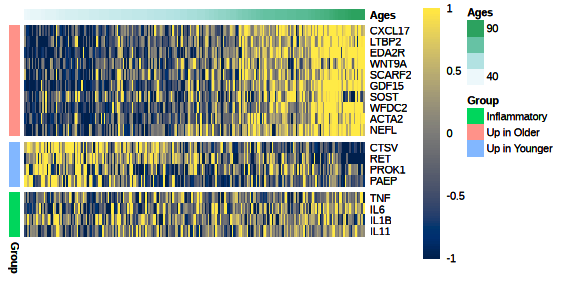

In [10]:
options(repr.plot.width = 120/25.4, repr.plot.height =  60/25.4)

p<-pheatmap(df_input, 
         breaks=breaks_sequence,
         cluster_rows=FALSE, 
         annotation=annotation,         annotation_row=row_annotation,
         fontsize = 6,
         cluster_cols=FALSE,
         gaps_row = c(10,14),
         show_colnames=FALSE,color= cividis(100),
         border_color=NA,
         scale='row')
p
save_pheatmap(p,'FigureB.pdf', width=120/25.4, height=60/25.4)

In [19]:
cor_results <- apply(df_input, 1, function(x) {
  test <- cor.test(x, annotation$Ages, method = "spearman")
  c(cor = test$estimate, p = test$p.value)
})

cor_df <- as.data.frame(t(cor_results))
cor_df
write.csv(cor_df,"cor_df.csv")

Warning message in cor.test.default(x, annotation$Ages, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, annotation$Ages, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, annotation$Ages, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, annotation$Ages, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, annotation$Ages, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, annotation$Ages, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, annotation$Ages, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, annotation$Ages, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, annotatio

,cor.rho,p
,<dbl>,<dbl>
CXCL17,0.70117896,4.708055e-35
LTBP2,0.66045741,6.010602e-30
EDA2R,0.75799812,7.978774e-44
WNT9A,0.52634765,1.196968e-17
SCARF2,0.56337772,1.701332e-20
GDF15,0.71636544,3.468713e-37
SOST,0.30478649,2.746479e-06
WFDC2,0.64766186,1.671071e-28
ACTA2,0.60365143,5.017861e-24
